# Week 3: Losses, Regularization, Evaluation

In [1]:
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt

## 3.1 Ridge Regularization (L2)

Below we experiment with different regularization parameters on regression datasets of various sizes.

In [2]:
# Will be used in the next exercises
def gen_train_test_sets(train_size, test_size):
    # Generate data where inputs are drawn uniformly from [0, 1]
    x = np.random.rand(train_size + test_size, 1)
    # Generate eps value (Gaussian noise) from a std normal distribution, for each x separately
    # Outputs y = x + eps
    y = x + np.random.randn(train_size + test_size, 1)
    # Split into training and test data
    x_train = x[:train_size]
    y_train = y[:train_size]
    x_test = x[train_size:]
    y_test = y[train_size:]
    print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
    train_set = pr.gendatr(x_train, y_train)
    test_set = pr.gendatr(x_test, y_test)
    return train_set, test_set

(2, 1) (2, 1) (1000, 1) (1000, 1)
2 by 1 prdataset with continuous targets.
Ridge regression, 1 to 1 trained mapping
MSE:  2.614688483389087


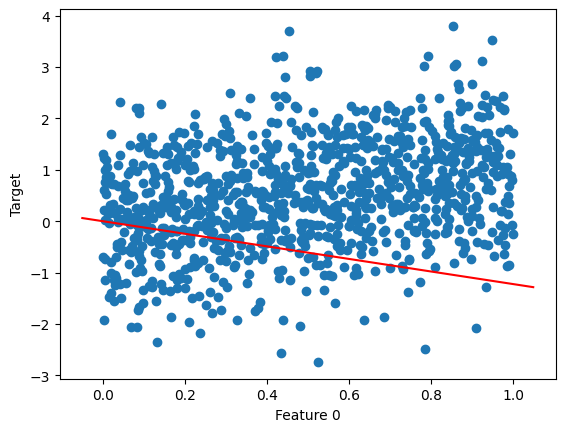

In [3]:
# Generate data where inputs are drawn uniformly from [0, 1]
train_data, test_data = gen_train_test_sets(2, 1000)
print(train_data)
pr.scatterr(test_data)

# Use ridger to fit a linear model to the data using L2 regularization
# TODO: Study the regression fit to the training data + squared loss for different amounts of regularization (in the range [10^-3, 10^3])
# TODO: Estimate the squared error using a somewhat larger test set!
R = pr.ridger(train_data, (0.001, False))   # regresssor without bias i.e. intercept w_0
print(R)
err = pr.testr(test_data, R, 'mse')
print('MSE: ', err)
pr.plotr(R, color='r')


*NOTE: given a regression data set of fixed size, one would typically use **cross-validation** to tune the regularization parameter.*

i.e. train `N` separate classifiers by rotating through your dataset `n` times, where all `n-1` chunks are used for training and 1 for testing.

(2, 1) (2, 1) (1000, 1) (1000, 1)


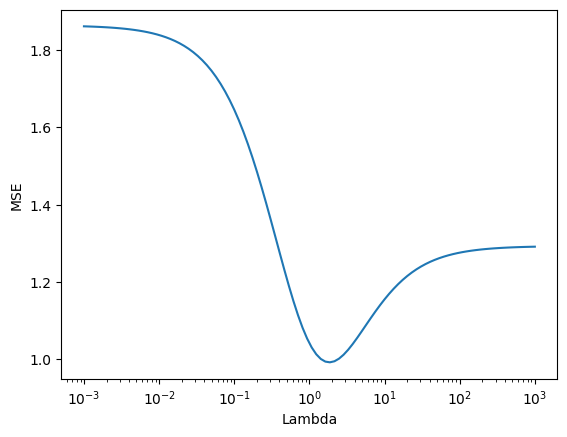

(10, 1) (10, 1) (1000, 1) (1000, 1)


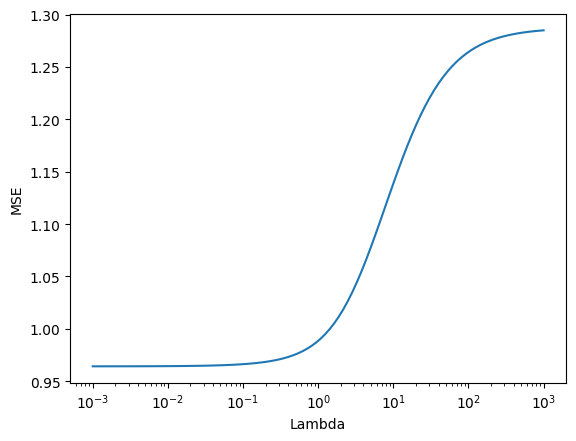

(100, 1) (100, 1) (1000, 1) (1000, 1)


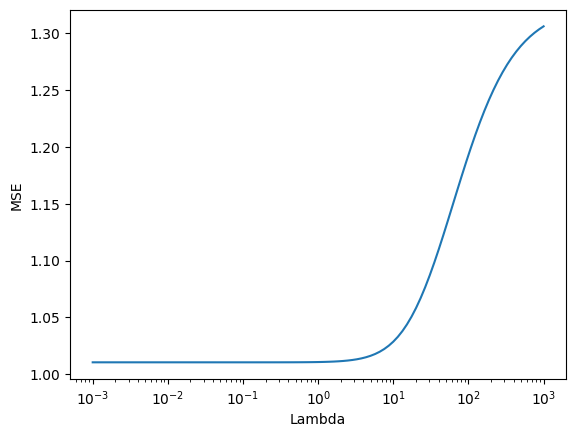

In [4]:
def plot_ridge_reg(train_size, test_size, lambdas):
    """Plots the MSE (y-axis) for different values of regularization param lambda (x-axis)"""
    train_data, test_data = gen_train_test_sets(train_size, test_size)
    mse = []
    for l in lambdas:
        R = pr.ridger(train_data, (l, False))
        mse.append(pr.testr(test_data, R, 'mse'))
    plt.plot(lambdas, mse)
    plt.xlabel('Lambda')
    plt.ylabel('MSE')
    plt.xscale('log')
    plt.show()

# TODO: determine optimal lambda for different train set sizes: 2, 10, 100
plot_ridge_reg(2, 1000, np.logspace(-3, 3, 100))  # Take 100 values between 10^-3 and 10^3 spaced evenly on a log scale
plot_ridge_reg(10, 1000, np.logspace(-3, 3, 100))
plot_ridge_reg(100, 1000, np.logspace(-3, 3, 100))

# It seems that the larger the train set, the higher the optimal lambda


## 3.3 LASSO Regularization (L1)

### Least Absolute Shrinkage and Selection Operator

- This type of regression uses L1 norm instead of L2
- Automatically reduces features that the final regressor depends on!

*In contrast to L2 regularization, entries of optimal `w` can become 0 for a finite no. of $\lambda$ - most often `w2` but for even larger $\lambda$* also the other entry will become 0

## 3.7 Sources of Variation

Below we investigate the difference in behavior of the error on the training and test set.

In [58]:
N = 30
errs = np.zeros(N)
test_set = pr.gendath([500, 500])
# Repeatedly generate a new training set and test it on the same test set
# Thus variance in the error is only due to variability in the training set
for i in range (N):
    train_set = pr.gendath([20, 20])
    w = pr.ldc(train_set)
    errs[i] = pr.testr(test_set, w, 'mse')
print(errs)
print(np.mean(errs))
print(np.std(errs))

[1.35118039 1.31716552 1.40295792 1.36085463 1.34556648 1.34236482
 1.34610402 1.30839906 1.38041047 1.33016975 1.33979632 1.35250907
 1.35263765 1.35989659 1.38077799 1.35847763 1.31439517 1.40959815
 1.35118156 1.32070799 1.32283197 1.46846921 1.38950081 1.37387084
 1.30780661 1.32787243 1.38079124 1.34072151 1.34094315 1.33569244]
1.3537883794939167
0.03372469971623696


Now we do the same thing but regenerate the test set instead.

In [60]:
N = 30
errs = np.zeros(N)
train_set = pr.gendath([20, 20])
# Repeatedly generate a new training set and test it on the same test set
# Thus variance in the error is only due to variability in the training set
for i in range (N):
    test_set = pr.gendath([500, 500])
    w = pr.ldc(train_set)
    errs[i] = pr.testr(test_set, w, 'mse')
print(errs)
print(np.mean(errs))
# NOTE: Since test set is relatively large, variation in error is much smaller
print(np.std(errs))

[1.3824288  1.38143357 1.37752194 1.37986098 1.38480639 1.38338165
 1.37725203 1.3824638  1.38348107 1.37843359 1.38171503 1.38205482
 1.37962104 1.37971019 1.37766837 1.37954402 1.38055588 1.37743682
 1.38578797 1.38001868 1.38087614 1.3794394  1.38072215 1.38217133
 1.3808947  1.38464941 1.3795199  1.38122475 1.38148496 1.37867838]
1.3808279251841291
0.0021917571427469682


## 3.8 Learning Curves

These are curves that plot classification errors against the training set size - in PRTools `cleval`.
The discrepancy between training and test curve is overfiting.

We are going to study these for different data sets and classifiers.

Highleyman dataset 2000 by 62 prdataset with 2 classes: [1000 1000]


(array([[0.46581197, 0.35416667, 0.47649573],
        [0.16571101, 0.19323394, 0.16743119],
        [0.11962366, 0.13978495, 0.13844086],
        [0.09733607, 0.1147541 , 0.10245902]]),
 array([[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00195312, 0.00390625, 0.00195312],
        [0.0234375 , 0.01464844, 0.01171875]]))

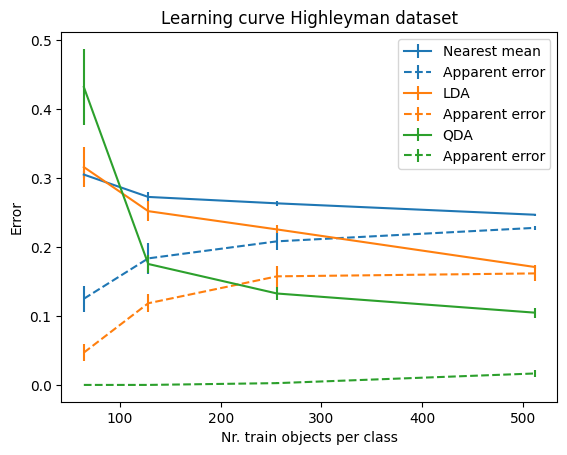

In [79]:
# Generate 2D Highleyman classes with 1000 samples per class
a = pr.gendath([1000, 1000])
# Enlarge the feature dim by adding 60 dims of class independent randomness i.e. plain noise
noise = np.random.randn(2000, 60)  # 2000 samples, 60 features
a.data = np.hstack((a.data, noise))
# a.concatenate(noise, axis=1)     # this does not do anything?
print(a)
# pr.scatterd(a)

# Use cleval to generate learning curves for NMC, LDC, QDA using train set sizes 64, 128, 256 and 512 - repeat often enough!
pr.cleval(a, pr.nmc(), [64, 128, 256, 512])
pr.cleval(a, pr.ldc(), [64, 128, 256, 512])
pr.cleval(a, pr.qdc(), [64, 128, 256, 512])
# plt.legend()

# NOTE: test curves go down, training curves go up - both converge in the end which is why they intersect
# More flexible classifiers (e.g. QDA) get a lower asymptotic error (i.e. lower test error), but need enough training data!

Below we study the learning curve for the 1-NN classifier (has 0 apparent error!).
This is because it is a very simple classifier.

Banana dataset 2000 by 62 prdataset with 2 classes: [1000 1000]


(array([[0.10950855, 0.11057692, 0.10202991],
        [0.09690367, 0.09002294, 0.09575688],
        [0.09005376, 0.09543011, 0.09610215],
        [0.09016393, 0.08196721, 0.08504098]]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]))

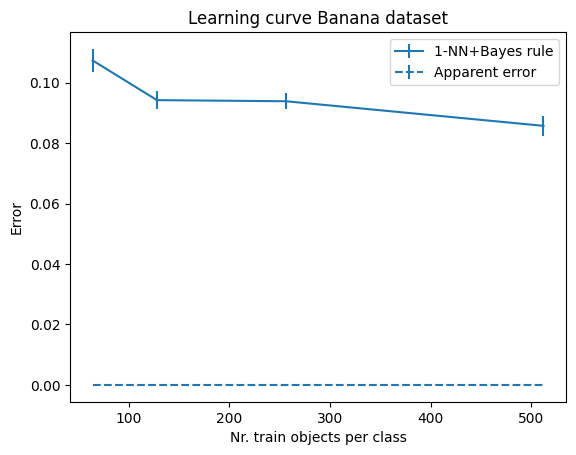

In [81]:
# Generate 2D Highleyman classes with 1000 samples per class
a = pr.gendatb([1000, 1000])
# Enlarge the feature dim by adding 60 dims of class independent randomness i.e. plain noise
noise = np.random.randn(2000, 60)  # 2000 samples, 60 features
a.data = np.hstack((a.data, noise))
print(a)

# Use cleval to generate learning curves for NMC, LDC, QDA using train set sizes 64, 128, 256 and 512 - repeat often enough!
pr.cleval(a, pr.knnc(), [64, 128, 256, 512])

## Feature Curves

These curves show how the classification error varies with varying numbers of feature dimensionality.
In PRTools we use `clevalf`.

In [8]:
# TODO: Load the dataset mfeat_kar and make feature curve for feature sizes 4, 8, 16, 32, 64 
a = pr.mfeat_kar()  # ???

# TODO: using 50% of the data for training based on QDA

# NOTE: when you don't change the training set, nothing will change in the learning curve
# NOTE: when only using 40% of the data, you tend to see overfitting
# a = pr.gendatb([1000, 1000])
feature_dims = [4, 8, 16, 32, 64]
pr.clevalf(a, pr.qdc(), feature_dims)

# help(pr.clevalf)

AttributeError: module 'prtools' has no attribute 'mfeat_kar'

## 3.9 Cross Validation

`prcrossval` allows you to perform a cross-validation on a given data set using a particular classifier (or a bunch of them in one go)

- N chunks used for training independent classifiers
- 1 chunk used for evaluating

The entire process is often repeated a number of times and results are averaged in order to rule out the effect of randomly splitting the folds. 

The results are compared with the ‘true’ performance trained on the FULL dataset (rather than a chunk) and tested by a larger test set.

*The plot below shows that error can be decomposed as $bias^2$ and $variance$*

[[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]]
[ 1  3  5  7 10 12 14 15 18 19]
[ 0  2  4  6  8  9 11 13 16 17]
[ 0  2  4  6  8  9 11 13 16 17]
[ 1  3  5  7 10 12 14 15 18 19]
[[0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]]
[ 2  3  5  8  9 11 14 16 17 19]
[ 0  1  4  6  7 10 12 13 15 18]
[ 0  1  4  6  7 10 12 13 15 18]
[ 2  3  5  8  9 11 14 16 17 19]
[[0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]]
[ 1  4  5  7 10 11 13 15 17 19]
[ 0  2  3  6  8  9 12 14 16 18]
[ 0  2  3  6  8  9 12 14 16 18]
[ 1  4  5  7 10 11 13 15 17 19]
[[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]]
[ 1  3  5  7  9 11 13 15 17 19]
[ 0  2  4  6  8 10 12 14 16 18]
[ 0  2  4  6  8 10 12 14 16 18]
[ 1  3  5  7  9 11 13 15 17 19]
[[0.

Text(0, 0.5, 'Error')

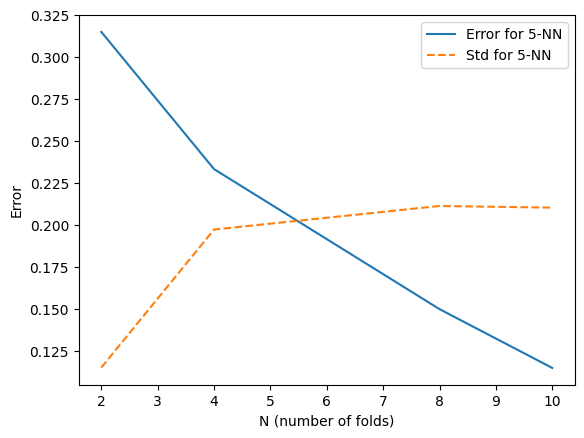

In [39]:
# Using N-fold cross validation, make plots for the error rates for kNN and 1NN over different values of N
# Also calculate the standard deviation of the error rates (avg the errors for all folds, then take std by comparing to true error)

train = pr.gendatb([10, 10])    # Note this is a rather small dataset! Large variance in error estimations

# Note we evaluate the classifier on a separate test set, trained using the same training set (but full)
test = pr.gendatb([1000,1000])  
e_true = pr.testc(test, pr.knnc(train, 1))

k = 5
N_fold_vals = [2, 4, 8, 10]
errs = []
sds = []
for N in N_fold_vals:
    # Append avg error over all folds and replications to errs list
    e = pr.prcrossval(train, pr.knnc(k), k = N, nrrep=10)  # Returns N * nrrep matrix of errors
    errs.append(np.mean(e))
    sd = np.std(e)
    sds.append(sd)
# Use same color for each pair of error and std
plt.plot(N_fold_vals, errs, label='Error for ' + str(k) + '-NN')
plt.plot(N_fold_vals, sds, '--', label='Std for ' + str(k) + '-NN')
plt.legend()
# Add labels to axes
plt.xlabel('N (number of folds)')
plt.ylabel('Error')


# NOTE: typically we see less biased error for larger N but more variance
# For a larger dataset, the bias and variance are both smaller
# NOTE: the errors plotted are APPARENT errors (on training set), so worse errors for higher kNN values (more complex) since they need more data
# NOTE: the more folds, the worse the classifier (less training data) so the worse the error

### On to next week...

Make a learning curve for `fisherc` for sample sizes ranging from 1- 50 per class for `gendats` in 40 dimensions.
Is this the learnig curve you had expected?

Class size:  1000
Class size:  1100


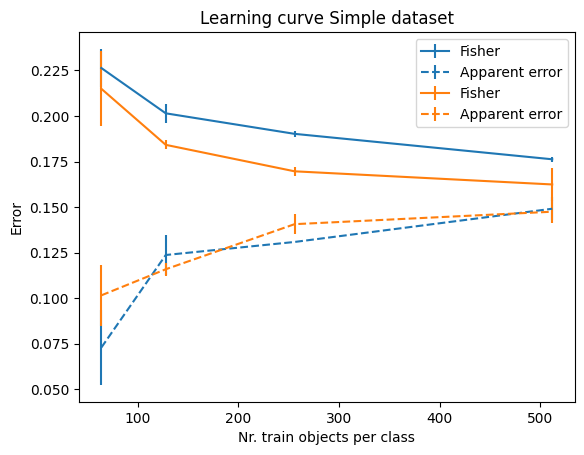

In [45]:
# class_sizes = [1, 2, 5, 10, 15, 25, 50]
class_sizes = [1000, 1100]

for i, s in enumerate(class_sizes):
    train = pr.gendats([s, s], dim = 40)
    pr.cleval(train, pr.fisherc(), [64, 128, 256, 512])
    print('Class size: ', s)